In [2]:
import pandas as pd
df = pd.read_csv('IPL Matches 2008-2020.csv')

In [157]:
df

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


# **ALL THIS DATA IS FROM 2008 TO 2020**

## Relation between winning toss and winning the match

In [4]:
df['winner'].unique

<bound method Series.unique of 0            Kolkata Knight Riders
1              Chennai Super Kings
2                 Delhi Daredevils
3      Royal Challengers Bangalore
4            Kolkata Knight Riders
                  ...             
811    Royal Challengers Bangalore
812                 Mumbai Indians
813            Sunrisers Hyderabad
814                 Delhi Capitals
815                 Mumbai Indians
Name: winner, Length: 816, dtype: object>

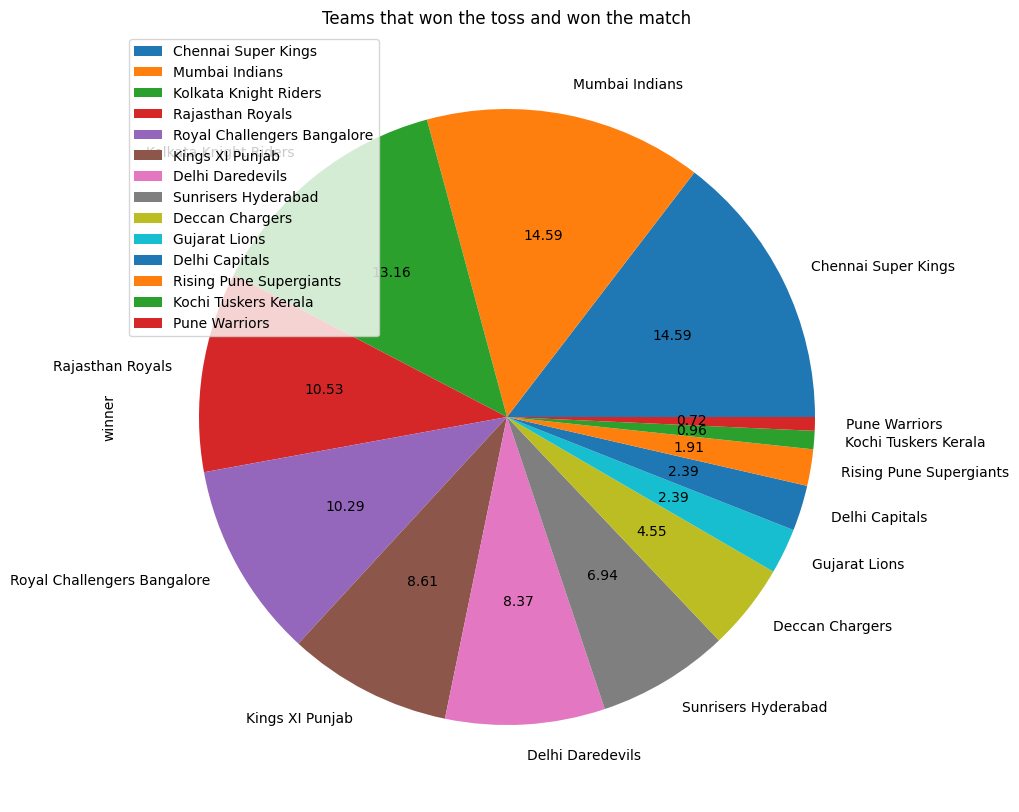

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,10)

toss_win = df[df['toss_winner'] == df['winner']]
toss_win = toss_win.replace('Rising Pune Supergiant','Rising Pune Supergiants')
toss_win['winner'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Teams that won the toss and won the match')
plt.legend(loc='upper left')

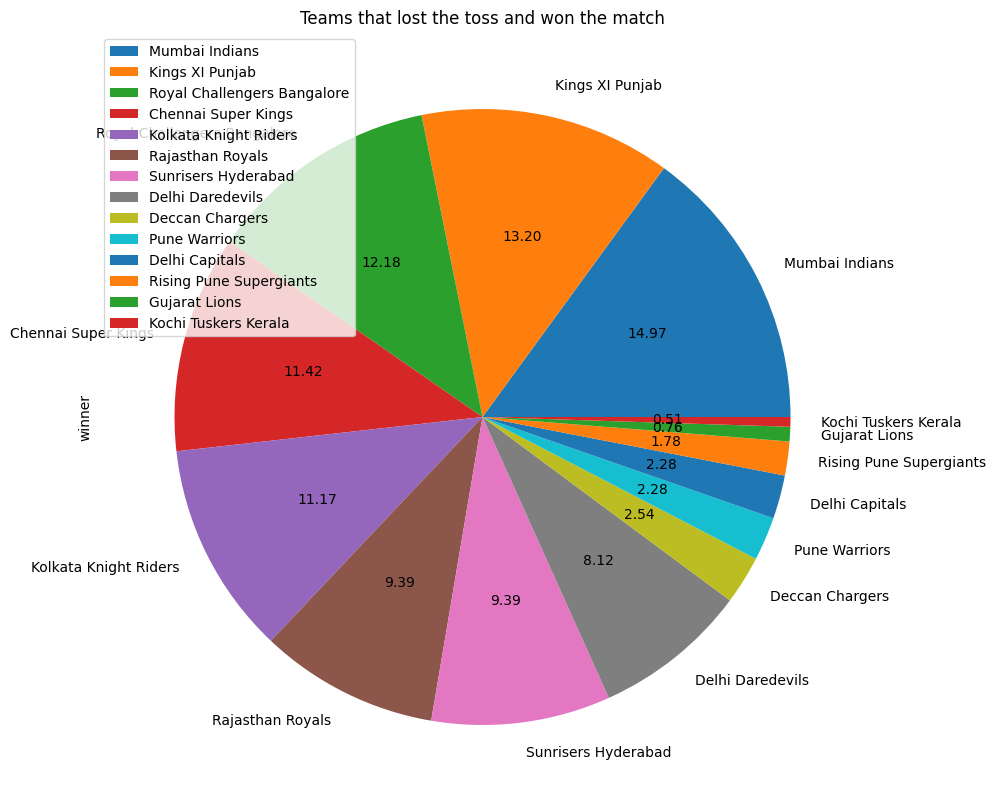

In [7]:
toss_win = df[df['toss_winner'] != df['winner']]
toss_win = toss_win.replace('Rising Pune Supergiant','Rising Pune Supergiants')
toss_win['winner'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Teams that lost the toss and won the match')
plt.legend(loc='upper left')

## we can also compare how many games a team won by winning the toss and chosing bat or field 


In [19]:
team_field = df[df['toss_decision']=='field']
team_bat = df[df['toss_decision']=='bat']

In [25]:
win_field = team_field[team_field['toss_winner']==team_field['winner']]
win_bat = team_bat[team_bat['toss_winner']==team_bat['winner']]

Text(0.5, 1.0, 'No. of games won by a Team that won the toss, chose to field ')

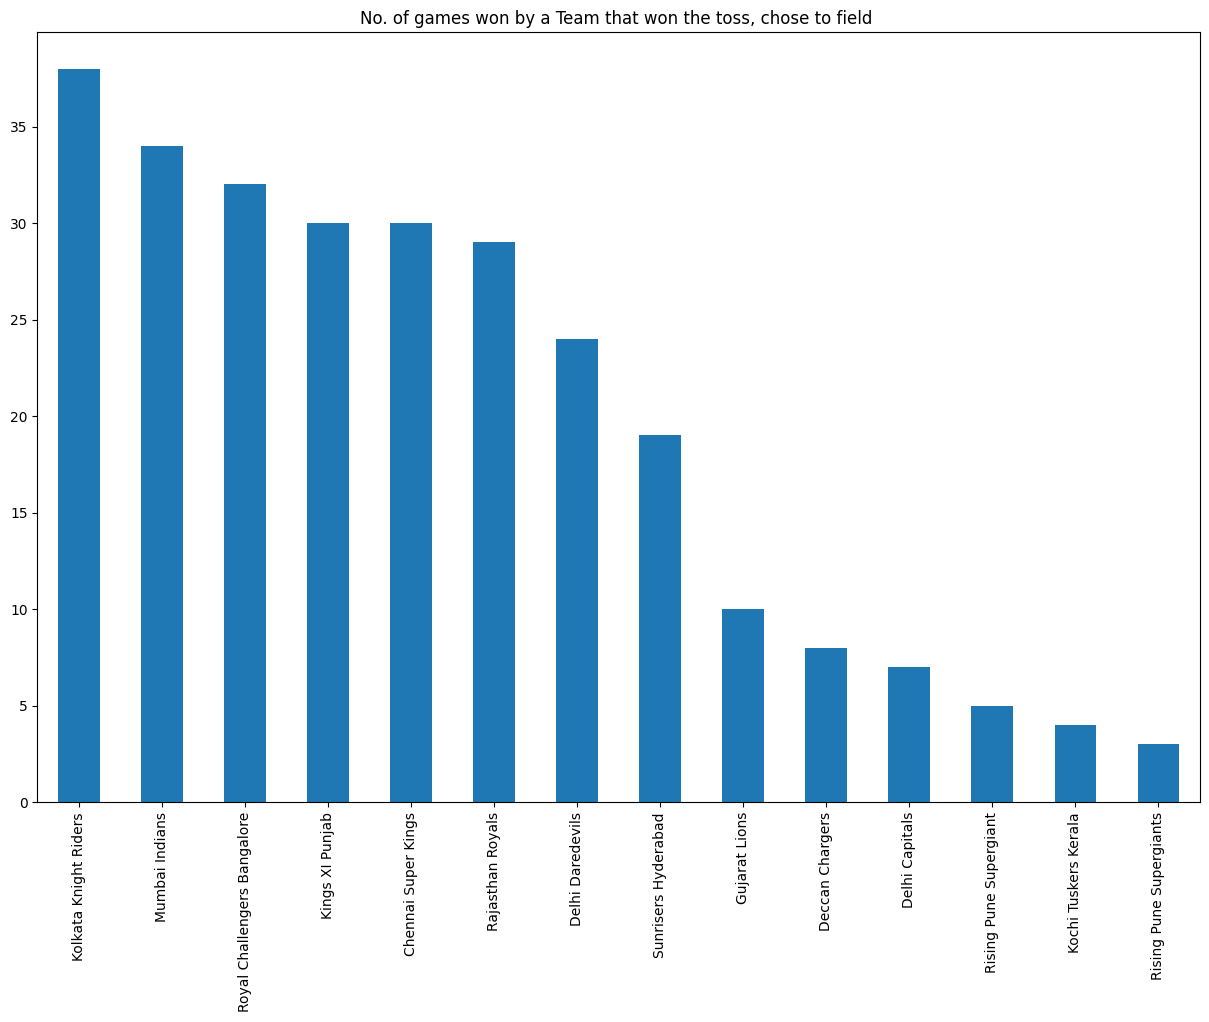

In [41]:
win_field['winner'].value_counts().plot(kind='bar')
plt.title('No. of games won by a Team that won the toss, chose to field ')

Text(0.5, 1.0, 'No. of games won by a Team that won the toss, chose to bat')

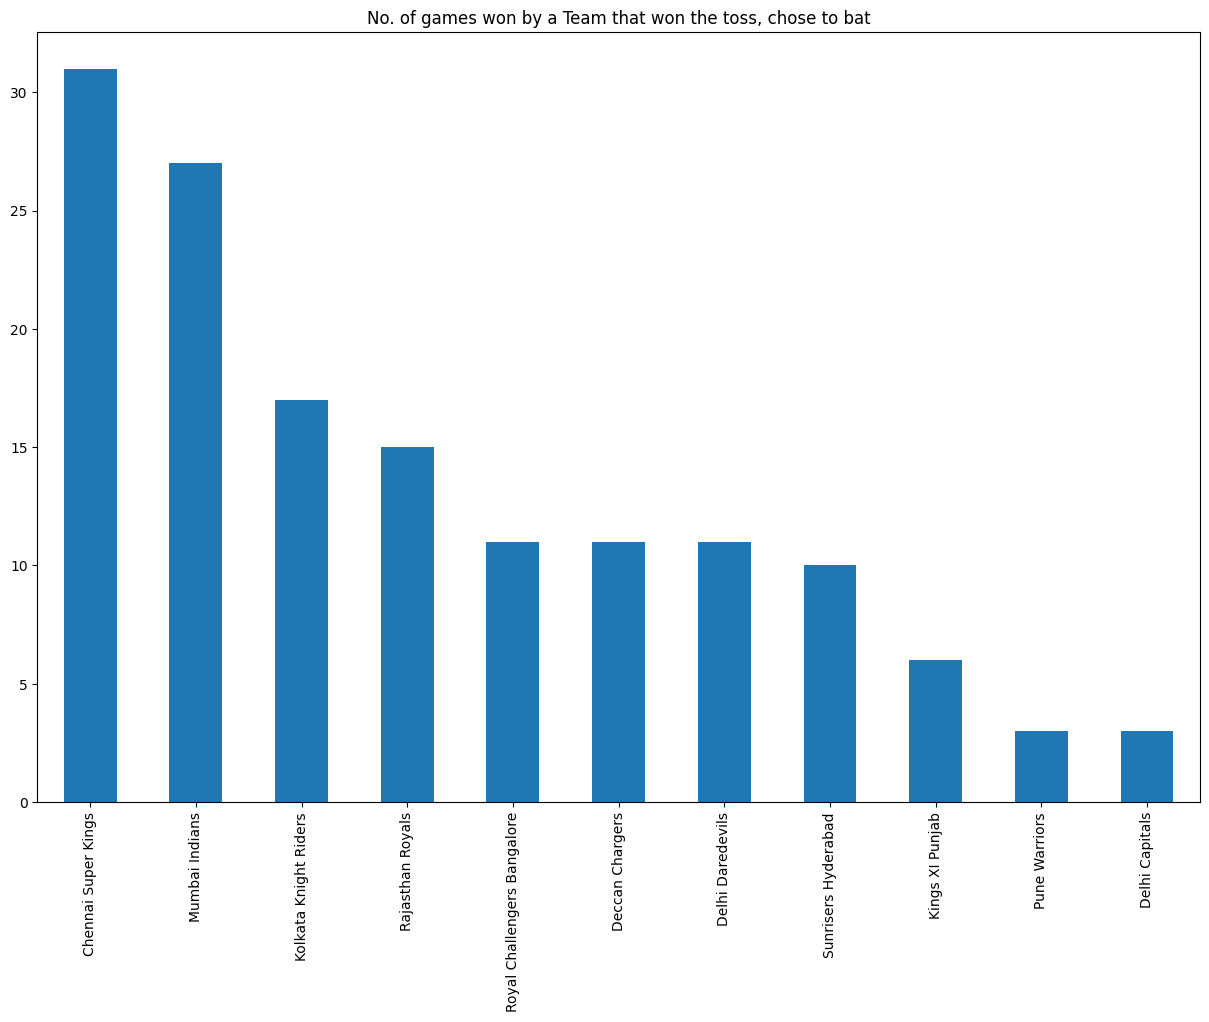

In [40]:
win_bat['winner'].value_counts().plot(kind='bar')
plt.title('No. of games won by a Team that won the toss, chose to bat')

## let's analyze CSK's home ground record

In [46]:
chepauk_df = df[df['venue']=='MA Chidambaram Stadium, Chepauk']

In [82]:
#chepauk_df['winner'].value_counts().plot(kind='pie',legend=True,autopct='%.2f')
losses = chepauk_df[chepauk_df['winner']!='Chennai Super Kings']
wins = chepauk_df[chepauk_df['winner']=='Chennai Super Kings']
wins = list(wins['winner'])
losses = list(losses['winner'])
total = wins+losses
for i in range(57):
    if(total[i] != 'Chennai Super Kings'):
        total[i] = 'Loss'
    else:
        total[i] = 'Win'




(array([40.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

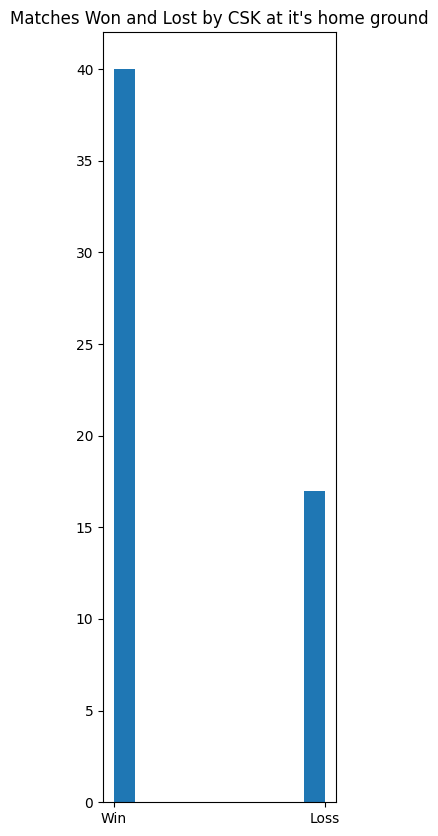

In [94]:
plt.rcParams['figure.figsize']=(3,10)
plt.title("Matches Won and Lost by CSK at it's home ground")
plt.hist(total)

<Axes: >

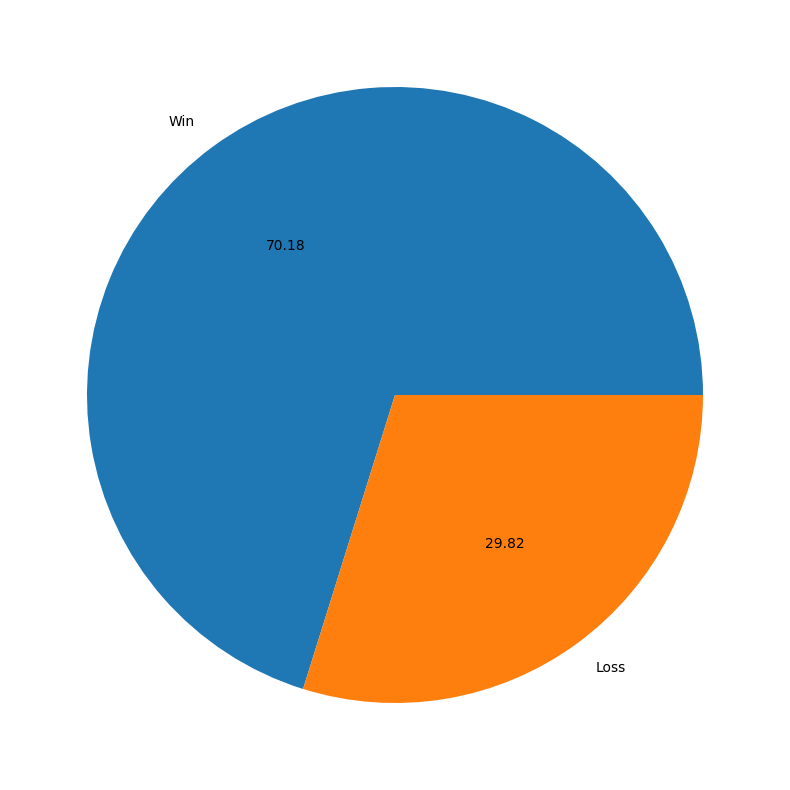

In [216]:
total = pd.Series(total)
total.value_counts().plot(kind='pie',autopct='%.2f')

## when CSK plays at its homeground, **70.1% probability is to win and 29.9% probability is to lose**

### we can analyze this for other teams too

## Analysis for RCB vs KKR rivalry

In [114]:
rcb = 'Royal Challengers Bangalore'
kkr = 'Kolkata Knight Riders'

In [121]:
rcb_matches = df.loc[df['team1']==rcb]
rcb_matches_2 = df.loc[df['team2']==rcb]
w1 = list(rcb_matches.loc[rcb_matches['team2']==kkr].winner)
w2 = list(rcb_matches_2.loc[rcb_matches_2['team1']==kkr].winner)

In [122]:
w = w1 + w2

Text(0.5, 1.0, 'Matches won by KKR and RCB face to face')

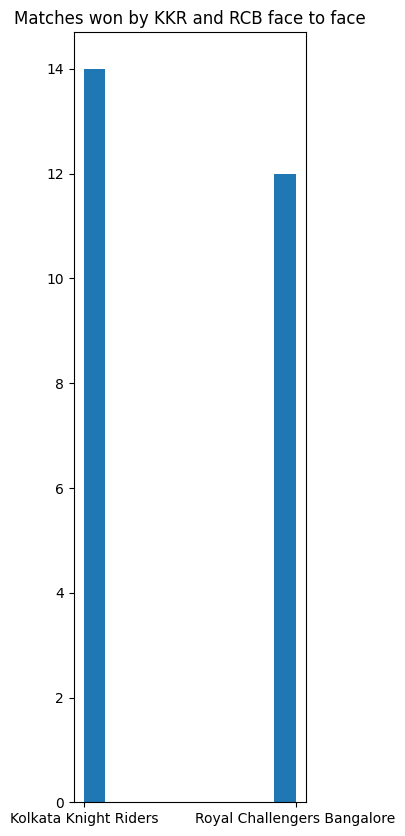

In [124]:
plt.hist(w)
plt.title('Matches won by KKR and RCB face to face')

<Axes: >

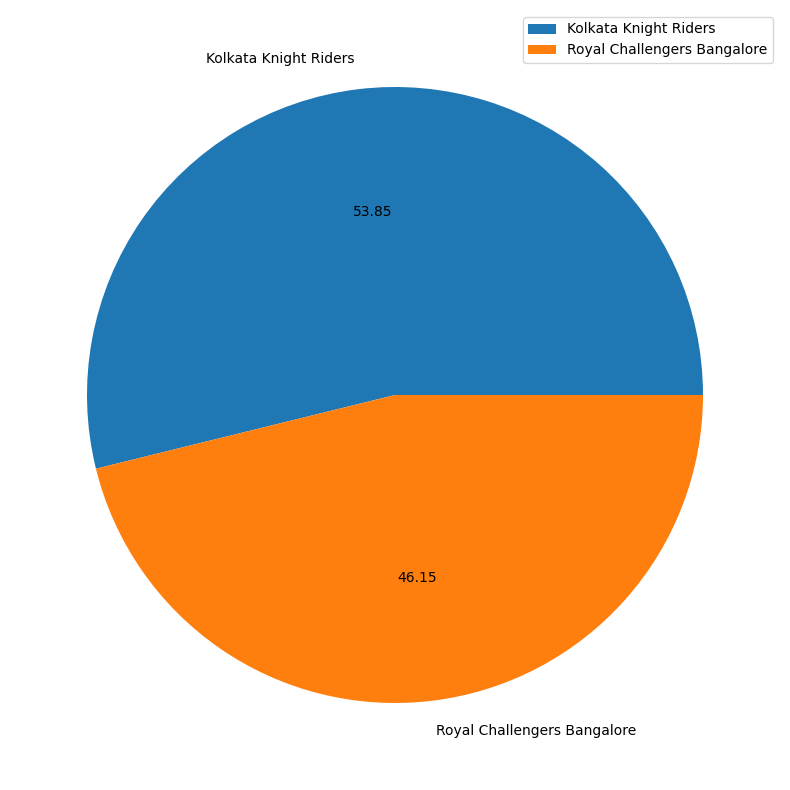

In [147]:
plt.rcParams['figure.figsize'] = (20,10)
pd.Series(w).value_counts().plot(kind='pie',autopct='%.2f',legend=True)

## top 10 Man of the Match winners

Text(0.5, 1.0, 'Top 10 Man of the Match winners')

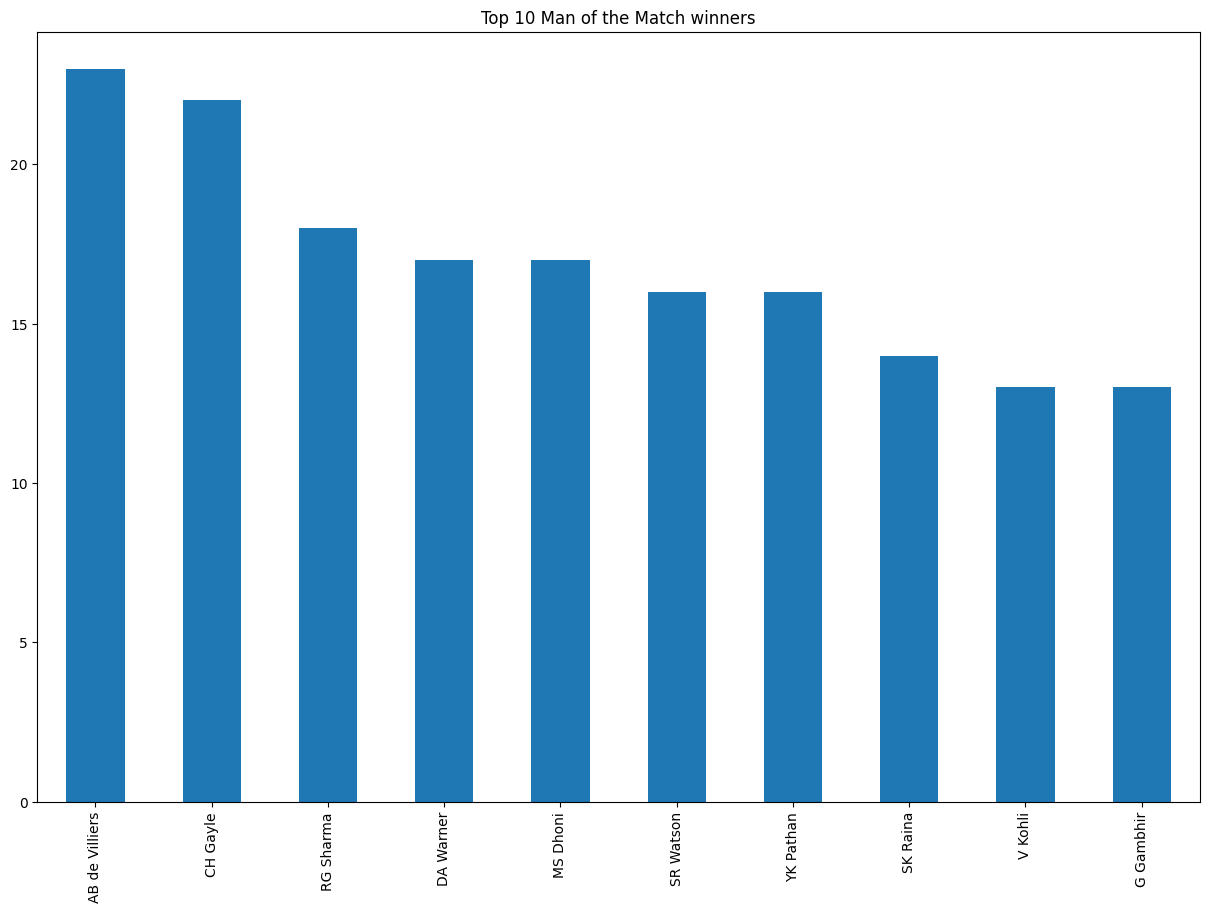

In [136]:
df['player_of_match'].value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 Man of the Match winners')

## Umpires during Mumbai Indians victories (just for fun :)

Text(0.5, 1.0, '1 st umpire when Mumbai Indians win the match')

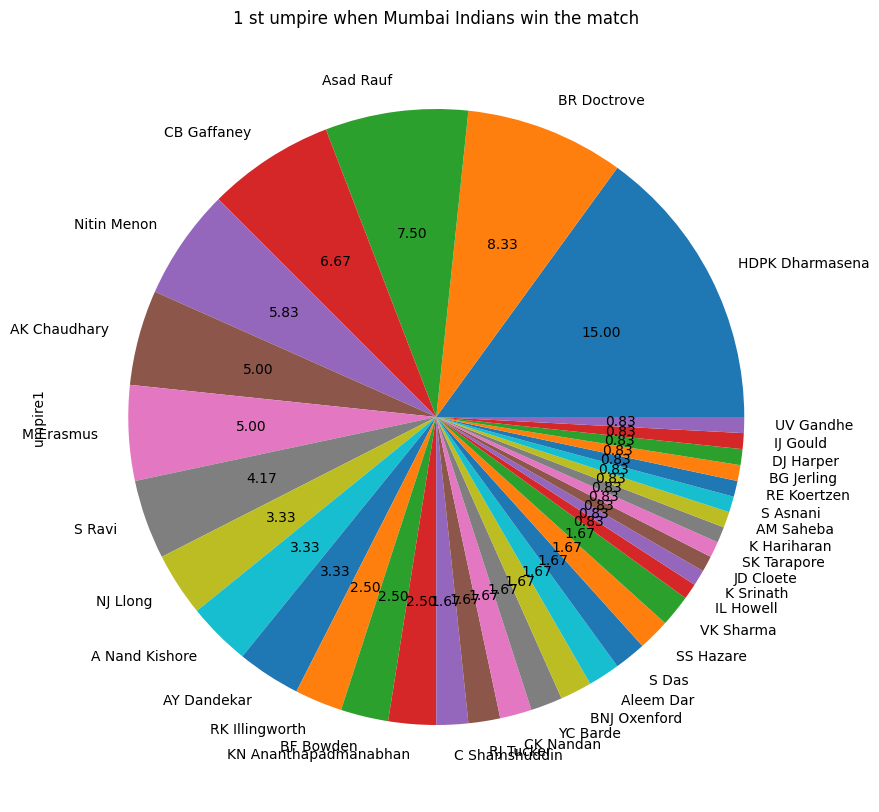

In [154]:
df[df['winner']=='Mumbai Indians']['umpire1'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('1 st umpire when Mumbai Indians win the match')

Text(0.5, 1.0, '2 nd umpire when Mumbai Indians win the match')

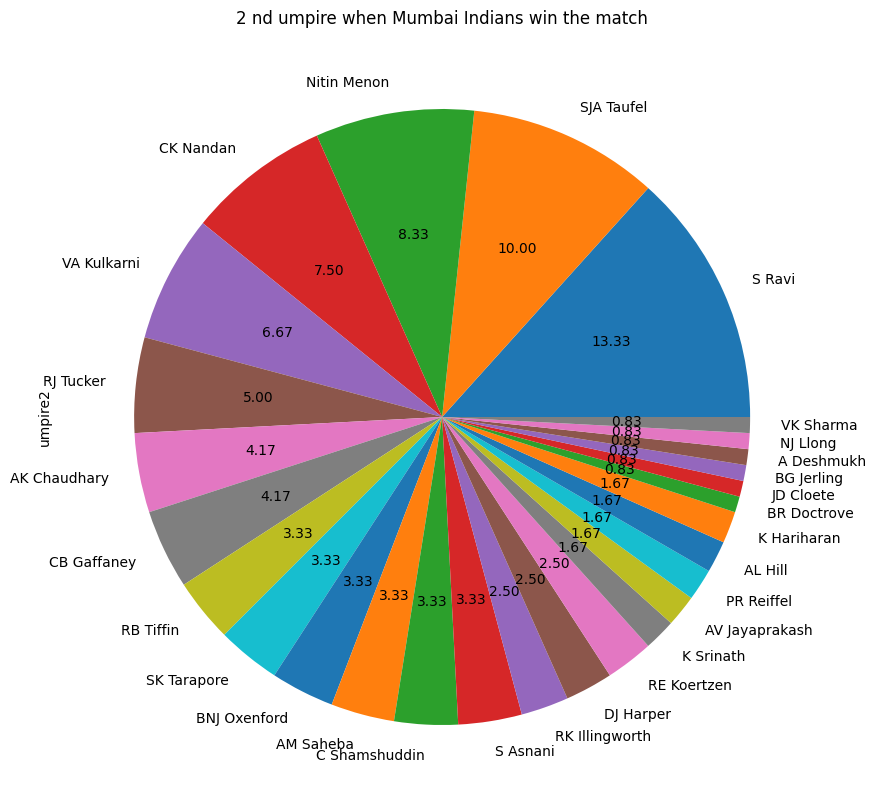

In [156]:
df[df['winner']=='Mumbai Indians']['umpire2'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('2 nd umpire when Mumbai Indians win the match')

## top 10 Highest Result Margin scores.

In [208]:
import seaborn as sns
res = df['result_margin']
res = res.dropna()
res = list(res)
res.sort()
res = res[::-1]

Text(0.5, 1.0, 'top 10 Highest result margin scores')

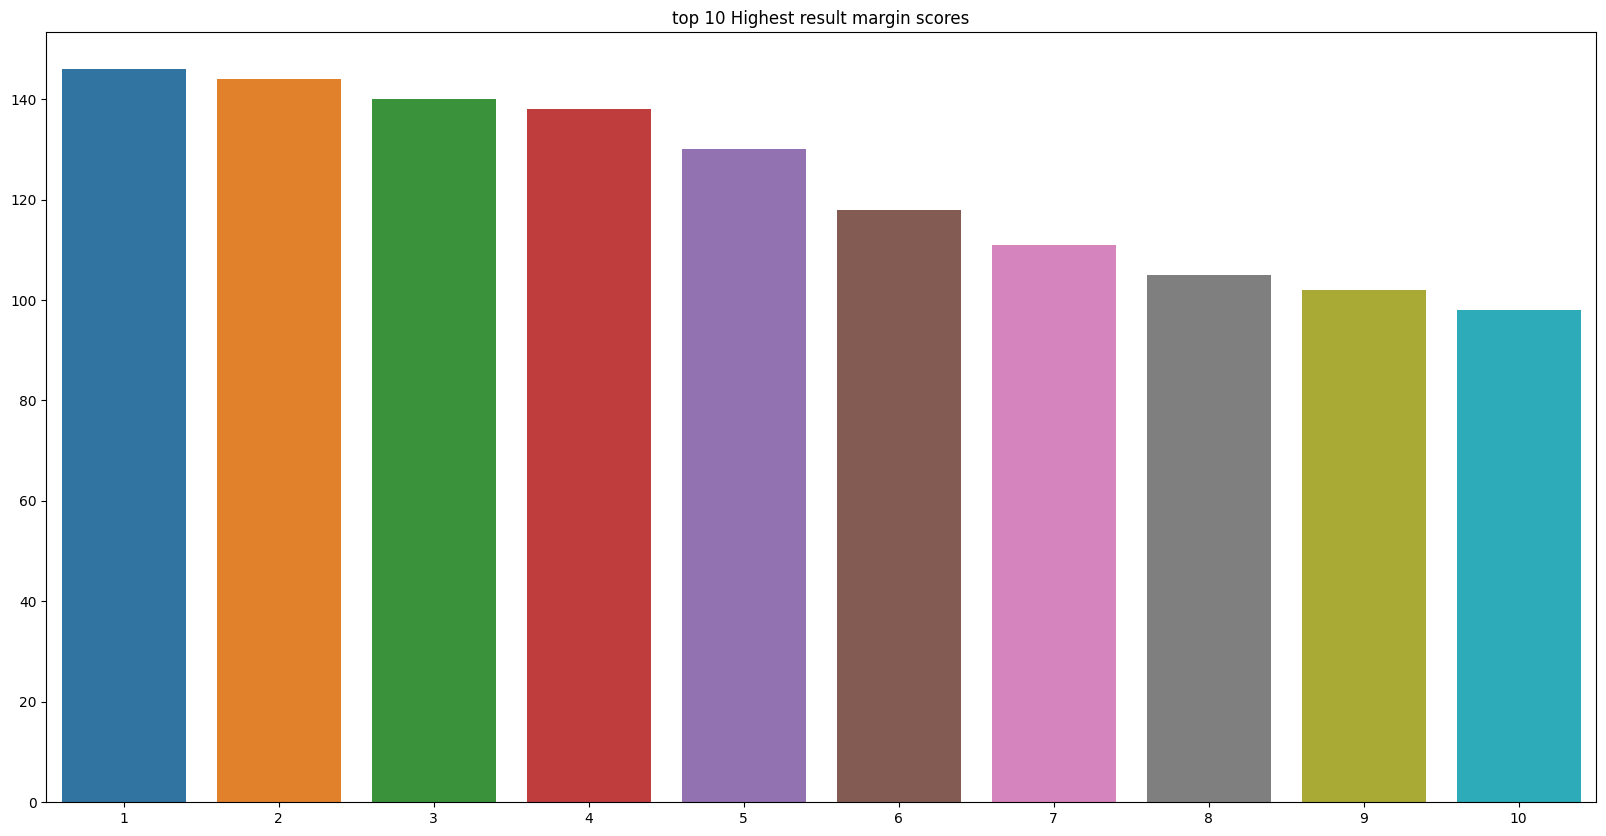

In [211]:
sns.barplot(x=[1,2,3,4,5,6,7,8,9,10],y=res[:10])
plt.title('top 10 Highest result margin scores')